In [1]:
# IMPORTS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn

In [3]:
# Get the data from the CSV file and print it

tennis = pd.read_csv('Datasets/tennis.csv')
tennis = tennis.astype('category')
tennis

In [18]:
# Decision Tree Classifier Step 1

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = tennis[tennis.columns[:-1]]
y = tennis[tennis.columns[-1]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf_tree = DecisionTreeClassifier()
clf_tree.fit(X_train, y_train)

ValueError: could not convert string to float: 'sunny'

In [64]:
# Decision Tree Classifier Step 2

from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder() 
tennis_encoded = pd.DataFrame({})

tennis_encoded['outlook'] = lb.fit_transform(tennis['outlook']) 
tennis_encoded['temp'] = lb.fit_transform(tennis['temp'] ) 
tennis_encoded['humidity'] = lb.fit_transform(tennis['humidity'] ) 
tennis_encoded['windy'] = lb.fit_transform(tennis['windy'] )   
tennis_encoded['play'] = tennis['play']

tennis_encoded

,outlook,temp,humidity,windy,play
0,2,1,0,0,no
1,2,1,0,1,no
2,0,1,0,0,yes
3,1,2,0,0,yes
4,1,0,1,0,yes
5,1,0,1,1,no
6,0,0,1,1,yes
7,2,2,0,0,no
8,2,0,1,0,yes
9,1,2,1,0,yes


In [76]:
# Decision Tree Classifier Step 3

X = tennis_encoded[tennis.columns[:-1]]
y = tennis_encoded[tennis.columns[-1]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf_tree = DecisionTreeClassifier()
clf_tree.fit(X_train, y_train)

print('Training score: {}'.format(clf_tree.score(X_train, y_train)))
print('Testing score: {}'.format(clf_tree.score(X_test, y_test)))

Training score: 1.0
Testing score: 0.6


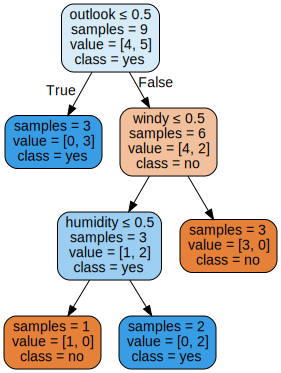

In [77]:
# Plot Decision Tree

# Install graphviz -> Open a terminal from the Jupyter and type: pip install graphviz 
# Or if from conda: conda install python-graphviz
# For help: https://scikit-learn.org/stable/modules/tree.html

import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(clf_tree, out_file=None, 
                                feature_names=X_train.columns,  
                                class_names=y_train.unique(),
                                filled=True, rounded=True,
                                impurity=False,
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph